### Hardener - P4A

Reading data	50.43 s
Preparing input	14.79 s


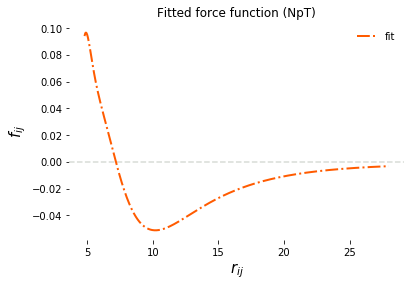

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 3/400}
steps = 3
timesteps_in_fit = 252

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=26,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                      system_style='molecular', op_sys='W')


proc.prepare_training_data()
proc.regress(method='bayesian')

x = np.linspace(4.8, 28, 1000)
y_fit = proc.predict(x)[0]
plot_1component(x, y_fit, thermostat='NpT', output_path="D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_fit.png")

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match_test.out"
params = range(0, -15, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': }

for steps in [2,3,4,5,6,7,8]:
    for timesteps_in_fit in [100, 200, 300, 400, 500]:
        proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                              basis=basis_function, basis_parameters=params,
                              every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                              system_style='molecular')

        proc.prepare_training_data()
        proc.regress(method='bayesian')

        x = np.linspace(4.6, 15, 1000)
        y_fit = proc.predict(x)[0]
        plot_1component(x, y_fit, thermostat='NpT', output_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}.png")

'\nfor steps in [2,3,4,5,6,7,8]:\n    for timesteps_in_fit in [100, 200, 300, 400, 500]:\n        proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,\n                              basis=basis_function, basis_parameters=params,\n                              every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,\n                              system_style=\'molecular\')\n\n        proc.prepare_training_data()\n        proc.regress(method=\'bayesian\')\n\n        x = np.linspace(4.6, 15, 1000)\n        y_fit = proc.predict(x)[0]\n        plot_1component(x, y_fit, thermostat=\'NpT\', output_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}.png")\n'

### Epoxy - DGEBA

Reading data	74.26 s
Preparing input	2.1 s


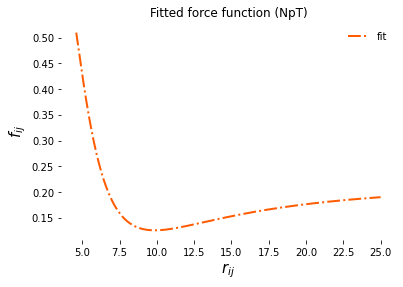

In [4]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/epoxy/epoxy_trajectory_match_test.out"
params = range(0, -15, -2)
simulation_timestep = 0.2
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 3/400}
steps = 8
timesteps_in_fit = 100

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                      system_style='molecular')

proc.prepare_training_data()
proc.regress(method='bayesian')

x = np.linspace(4.6, 25, 1000)
y_fit = proc.predict(x)[0]
plot_1component(x, y_fit)

In [5]:
print(min(y_fit))

0.12594054657902393


In [ ]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/epoxy/epoxy_trajectory_match_test.out"
params = range(0, -15, -2)
simulation_timestep = 0.2
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': }

for steps in [2,3,4,5]:
    for timesteps_in_fit in range(50, 500, 50):
        for cutoff in range(25, 35, 3):
            proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                                  basis=basis_function, basis_parameters=params,
                                  every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                                  system_style='molecular')

            proc.prepare_training_data()
            proc.regress(method='bayesian')

            x = np.linspace(4.6, 25, 1000)
            y_fit = proc.predict(x)[0]
            plot_1component(x, y_fit, thermostat='NpT', output_path=f"D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/epoxy/tm_npt_{steps}_{timesteps_in_fit}_{cutoff}.png")

Reading data	